In [79]:
import gym
import d4rl # Import required to register environments
import seaborn as sns

from sklearn.manifold import TSNE

In [66]:
sns.set_style("ticks")
sns.set_context("paper", 1.5, {"lines.linewidth": 2})

In [74]:
name = "halfcheetah-medium-v2"
env = gym.make(name)
dataset = env.get_dataset()
rewards = dataset['rewards']
actions = dataset['actions']
observations = dataset['observations']

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.21it/s]


# Rewardsでラベルづけ（rewardが大きいところをクラス１、それ以外をクラス0とするイメージ）

In [75]:
trajectory_set = np.array([rewards[i * 1000: (i + 1) * 1000] for i in range(len(data) // 1000)])
trajectory_mean = trajectory_set.mean(axis=0)
trajectory_std = trajectory_set.std(axis=0)

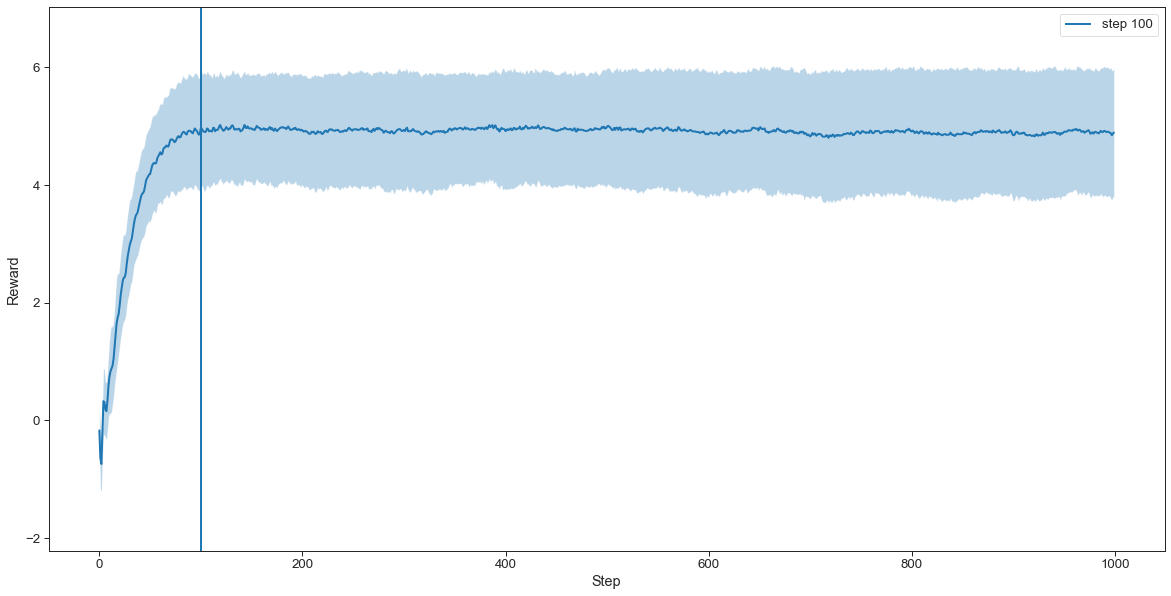

In [78]:
x = np.arange(len(data) // 1000)
trajectory_lower = trajectory_mean - trajectory_std
trajectory_upper = trajectory_mean + trajectory_std

plt.figure(figsize=(20, 10))
plt.plot(trajectory_mean)
plt.fill_between(x, trajectory_lower, trajectory_upper, alpha=0.3)
plt.vlines(x=100, ymin=min(trajectory_lower) - 1, ymax=max(trajectory_upper) + 1, label='step 100')
plt.ylim(min(trajectory_lower) - 1, max(trajectory_upper) + 1)
plt.ylabel('Reward')
plt.xlabel('Step')
plt.legend()
plt.show()

# T-SNEで可視化

In [117]:
max_length = 5000
threshold = 100
X = observations[:max_length, :]
labels = []
for step in range(max_length):
    offset = step % 1000
    if step % 1000 < threshold:
        labels.append(0)
    else:
        labels.append(1)

In [118]:
tsne = TSNE(n_components=2, random_state=41)
X_reduced = tsne.fit_transform(X)

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


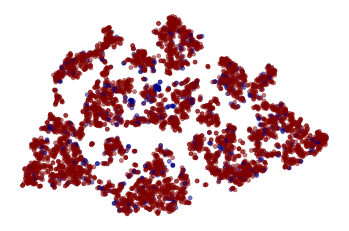

In [119]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=labels, cmap='jet',
            s=15, alpha=0.5)
plt.axis('off')
plt.show()